# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

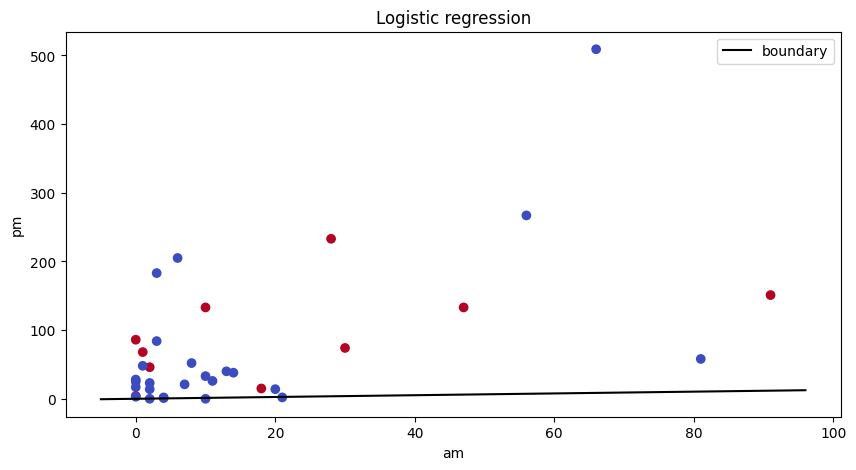

In [26]:
df = pd.read_csv('../data/am_pm.csv')
X = df[['am', 'pm']].values 
y = df['target'].values
lr = LogisticRegression(random_state=21, fit_intercept=False)
lr.fit(X, y)
y_pred = lr.predict(X)

fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df['am'], df['pm'], c=[0 if i == 'working_day' else 1 for i in df['target']], cmap='coolwarm')
plt.xlabel('x')
plt.ylabel('y')
x_plot = np.array([min(df['am']) - 5, max(df['am']) + 5])
y_plot = (-1 / lr.coef_[0][1]) * lr.coef_[0][0] * x_plot
ax.plot(x_plot, y_plot, label='boundary', color='black')
ax.set_title('Logistic regression')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

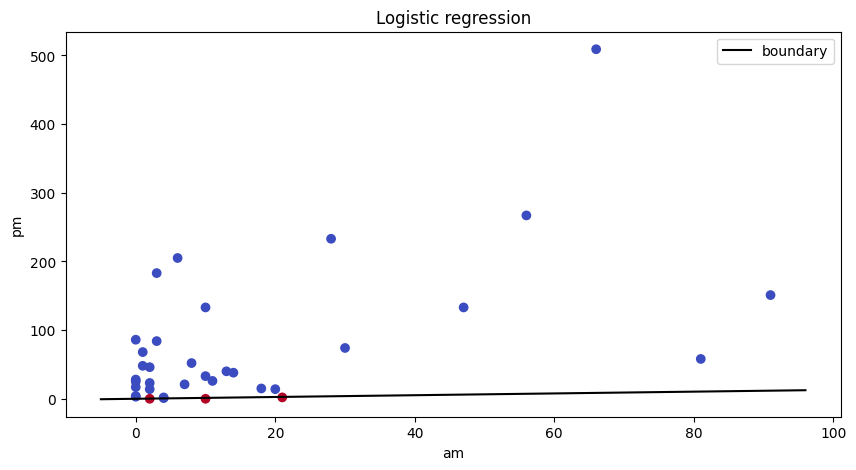

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df['am'], df['pm'], c=[0 if i == 'working_day' else 1 for i in df['predict']], cmap='coolwarm')
plt.xlabel('x')
plt.ylabel('y')

x_plot = np.array([min(df['am']) - 5, max(df['am']) + 5])
y_plot = (-1 / lr.coef_[0][1]) * lr.coef_[0][0] * x_plot
ax.plot(x_plot, y_plot, label='boundary', color='black')
ax.set_title('Logistic regression')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [28]:
sc = StandardScaler()
df_sc = df
df_sc[['am', 'pm']] = sc.fit_transform(X)

lr = LogisticRegression(fit_intercept=False, random_state=21)
X = df_sc[['am', 'pm']]
y = df_sc.target
lr.fit(X, y)
y_sc = lr.predict(X)
df_sc['predict'] = y_sc

accuracy_score(y, y_sc)

0.7428571428571429

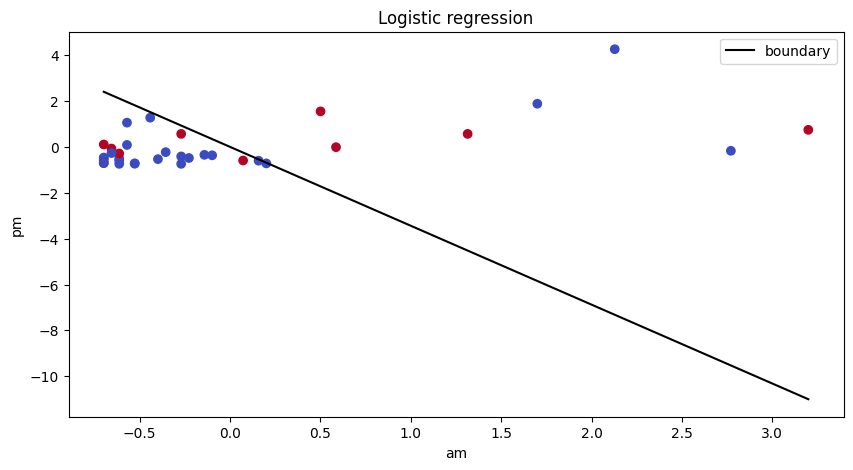

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df['am'], df_sc['pm'], c=[0 if i == 'working_day' else 1 for i in df_sc['target']], cmap='coolwarm')
plt.xlabel('x')
plt.ylabel('y')

x_plot = np.array([min(df_sc['am']), max(df_sc['am'])])
y_plot = (-1 / lr.coef_[0][1]) * lr.coef_[0][0] * x_plot

ax.plot(x_plot, y_plot, label='boundary', color='black')
ax.set_title('Logistic regression')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

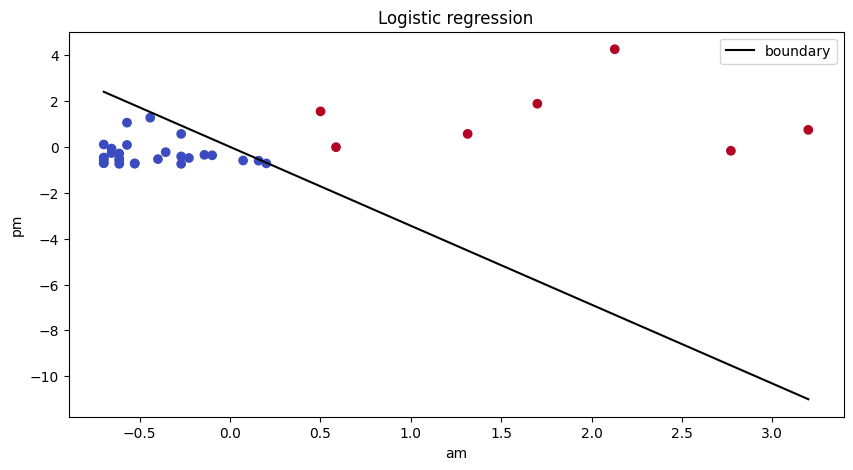

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df['am'], df_sc['pm'], c=[0 if i == 'working_day' else 1 for i in df_sc['predict']], cmap='coolwarm')
plt.xlabel('x')
plt.ylabel('y')

x_plot = np.array([min(df_sc['am']), max(df_sc['am'])])
y_plot = (-1 / lr.coef_[0][1]) * lr.coef_[0][0] * x_plot

ax.plot(x_plot, y_plot, label='boundary', color='black')
ax.set_title('Logistic regression')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [33]:
svc = SVC(probability=True, random_state=21)
df_svc = df.drop(columns='predict')
df_svc[['am', 'pm']] = sc.fit_transform(X)

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
cv = GridSearchCV(svc, param_grid, scoring='accuracy')
cv.fit(X, y)
cv.best_params_

{'kernel': 'poly'}

In [34]:
clf = SVC(kernel='rbf', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
df_svc['predict_rbf'] = y_svm
accuracy_score(y, y_svm)

0.7428571428571429

In [35]:
clf = SVC(kernel='linear', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
df_svc['predict_linear'] = y_svm
accuracy_score(y, y_svm)

0.7142857142857143

In [36]:
clf = SVC(kernel='poly', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
df_svc['predict_poly'] = y_svm
accuracy_score(y, y_svm)

0.7428571428571429

In [37]:
clf = SVC(kernel='sigmoid', probability=True, random_state=21)
svc = clf.fit(X,y)
y_svm = svc.predict(X)
df_svc['predict_sigmoid'] = y_svm
accuracy_score(y, y_svm)

0.6857142857142857

In [39]:
df_svc.head()


,date,am,pm,target,predict_rbf,predict_linear,predict_poly,predict_sigmoid
0,2020-04-17,0.200690,-0.719904,working_day,working_day,working_day,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day,working_day,working_day,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day,working_day,working_day,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day,working_day,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day,working_day,working_day,working_day


/Users/dz/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


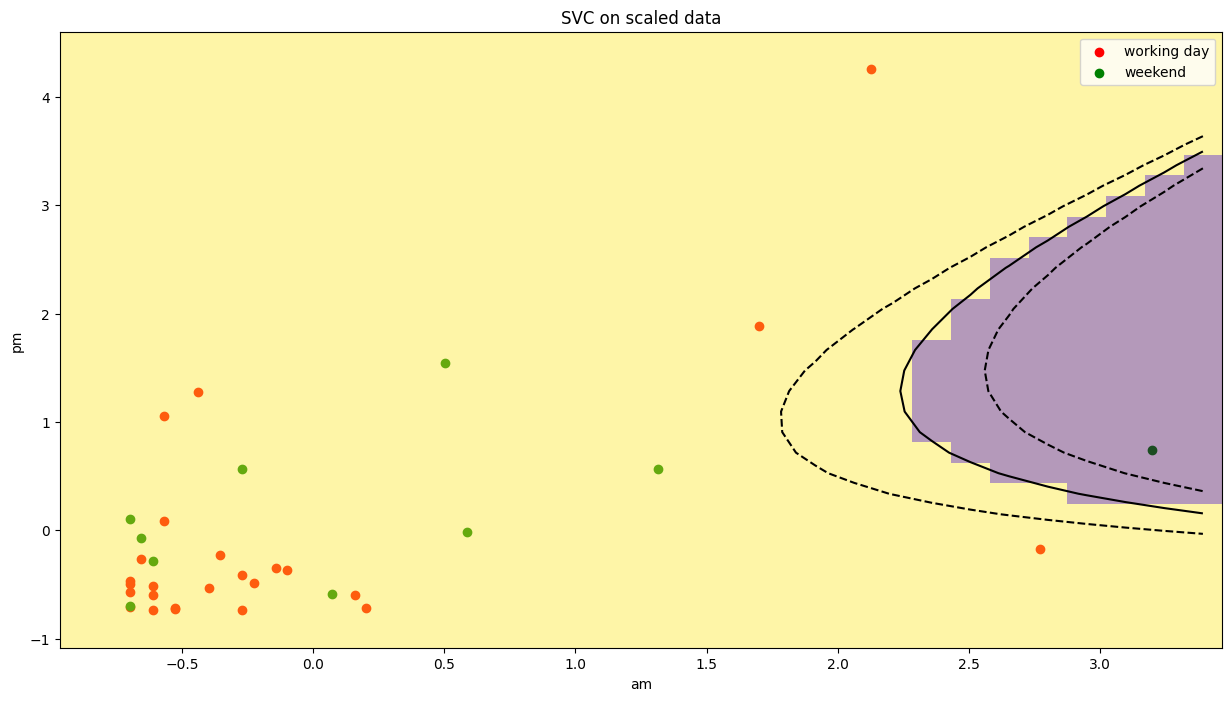

In [47]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df_svc.loc[df_svc['target'] == 'working_day']['am'],
           y=df_svc.loc[df_svc['target'] == 'working_day']['pm'],
           color='red', label='working day')
ax.scatter(x=df_svc.loc[df_svc['target'] == 'weekend']['am'],
           y=df_svc.loc[df_svc['target'] == 'weekend']['pm'],
           color='green', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cv.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.4)
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5],
           linestyles=['--', '-', '--'])
ax.set_title('SVC on scaled data')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

/Users/dz/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


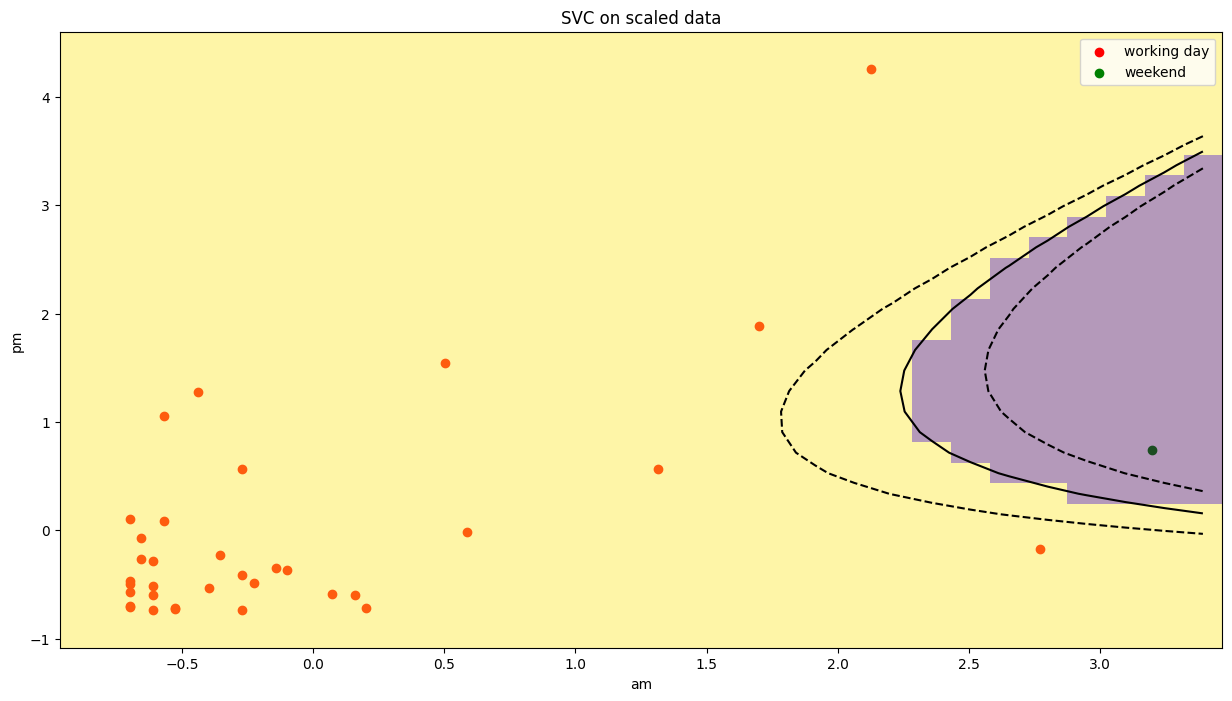

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df_svc.loc[df_svc['predict_poly'] == 'working_day']['am'],
           y=df_svc.loc[df_svc['predict_poly'] == 'working_day']['pm'],
           color='red', label='working day')
ax.scatter(x=df_svc.loc[df_svc['predict_poly'] == 'weekend']['am'],
           y=df_svc.loc[df_svc['predict_poly'] == 'weekend']['pm'],
           color='green', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cv.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.4)
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5],
           linestyles=['--', '-', '--'])
ax.set_title('SVC on scaled data')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper right')
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [49]:
df_dts = df.drop(columns=['predict'])
dtc = DecisionTreeClassifier(max_depth=4, random_state=42)
dtc.fit(X, y)
y_dts = dtc.predict(X)
df_dts['predict_dts'] = y_dts
accuracy_score(y, y_dts)


0.9428571428571428

In [50]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X, y)
y_dts = dtc.predict(X)
accuracy_score(y, y_dts)

0.9714285714285714

In [51]:
dtc = DecisionTreeClassifier(max_depth=6, random_state=42)
dtc.fit(X, y)
y_dts = dtc.predict(X)
accuracy_score(y, y_dts)

1.0

In [52]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X, y)
y_dts = dtc.predict(X)
accuracy_score(y, y_dts)

0.8857142857142857

In [53]:
param_grid = {'max_depth': np.arange(4, 5)}
gs = GridSearchCV(dtc, param_grid, scoring='accuracy')
gs.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'max_depth': array([4])}, scoring='accuracy')

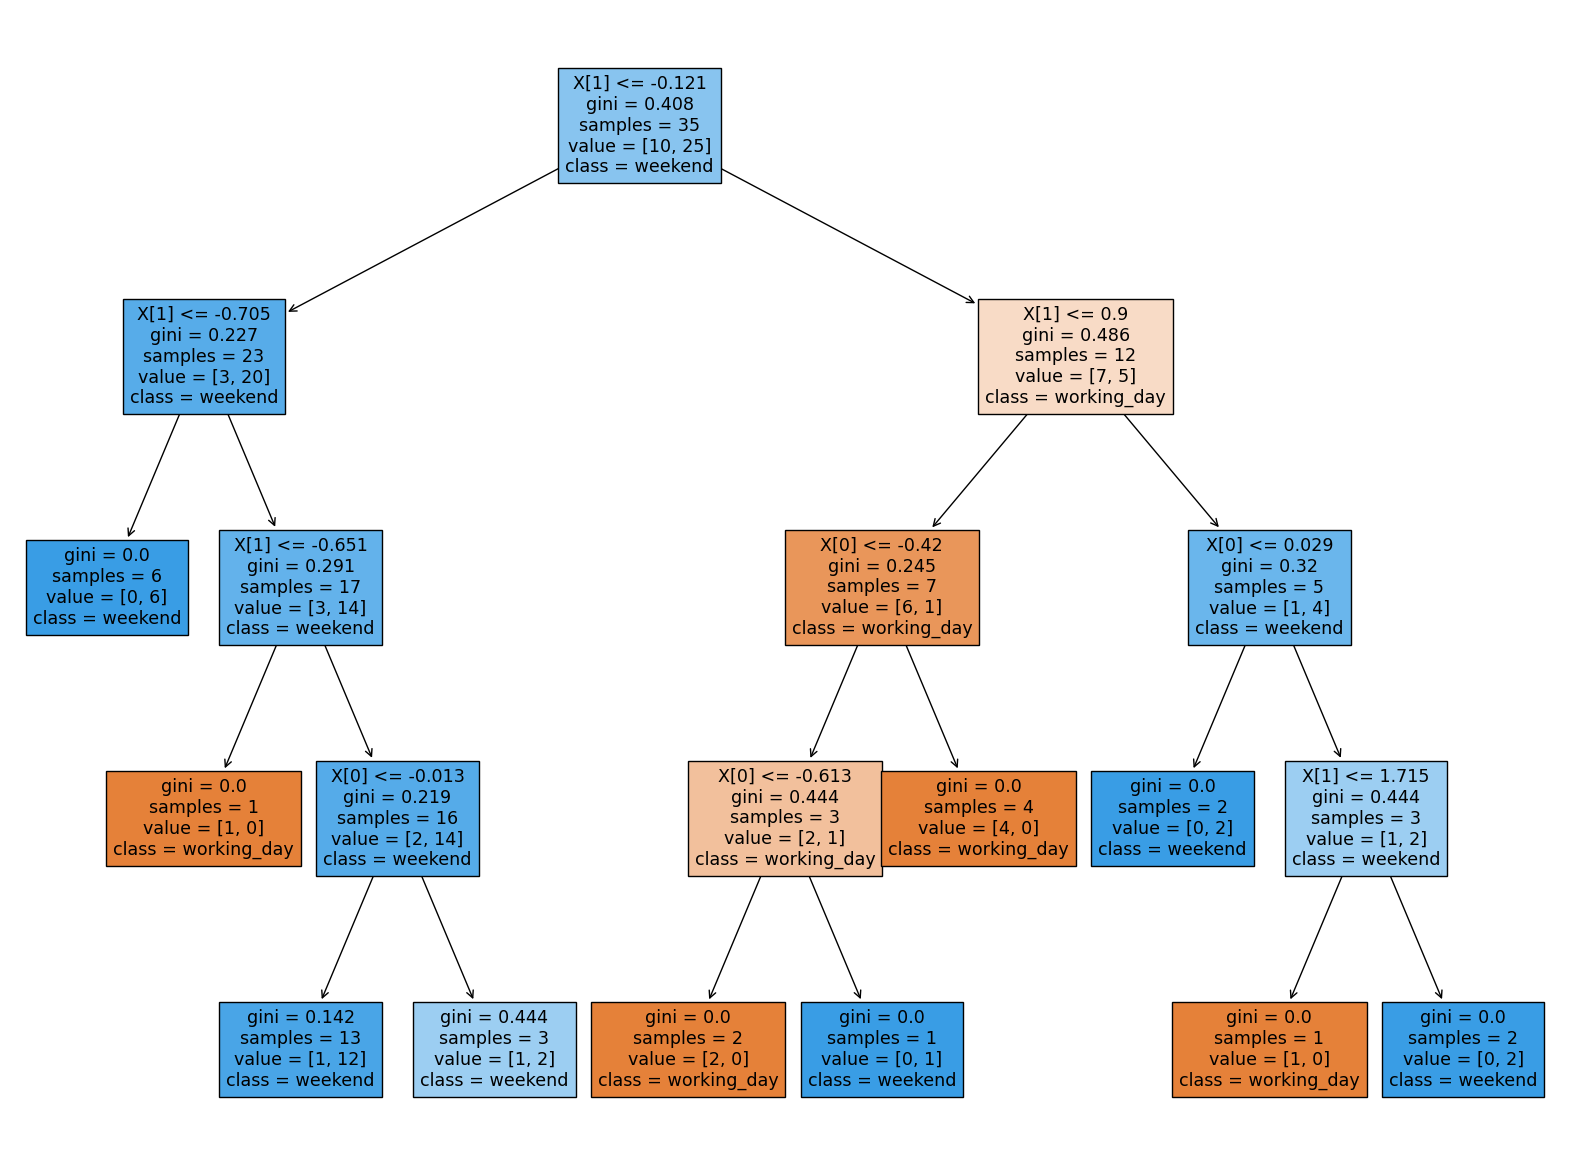

In [54]:
fig, ax = plt.subplots(figsize=(20, 15))

plot_tree(gs.best_estimator_,
          class_names=['working_day', 'weekend'],
          filled=True, ax=ax)
plt.show()

## Four leaves in the visualized tree label days as working days